## Welcome
This is the first exercise of the Course. 

To start with, we are going to show you how to access and download chemical inforamtion from the Pubchem database. 

It is a database widely used in biomedical and pharmaceutical research, where researchers upload their published data

Here a [link](https://pubchem.ncbi.nlm.nih.gov/) to the webpage. 

Luckily, there is a python library available using the pubchem API!! 



In [8]:
# Import the PubchemPy library as pcp. The code to import other neccessary libraries is already written for you.
import pubchempy as pcp
import pandas as pd
from tqdm import tqdm

# welcome to the course

## Ex1:

https://pubchem.ncbi.nlm.nih.gov/compound/Aspirin 
video - intro pubchempy + 

import the modules pubchempy, pandas, numpy? 

In [11]:
# script ex1:
# first exercise - warm up 
#import pubchempy as pcp
# we're now downloading the record of aspirin
c = pcp.Compound.from_cid(2244)  # find aspirin cid
# access the SMILES and print it - explained in video above
print(c.canonical_smiles)
print(c.xlogp)
print(c.synonyms[0]) # only access the first element

CC(=O)OC1=CC=CC=C1C(=O)O
1.2
aspirin


In [9]:
# script ex1: SOLUTION

# define downloader function 

# Basile: rename to download_by_CID ?
def compound_finder_name(compounds):
    '''
    downloads the compounds based on CID. 
    coumpounds: list of CIDs (integers).
    Use compounds = list(range(from, to))
    '''
    df = pd.DataFrame()
    d = dict()
    smiles = []
    synonyms = []
    logPs = []
    for compound in tqdm(compounds):
        c = pcp.Compound.from_cid(compound)
        smile = c.canonical_smiles
        synonym = c.synonyms
        logP = c.xlogp
        smiles.append(smile)
        synonyms.append(synonym)
        logPs.append(logP)
        print('compound: ',compound, ' OK')
        #d = dict({synonym : [smiles]})
    d['synonym'] = synonyms
    d['smiles'] = smiles
    d['logP'] = logPs
    
    df = pd.DataFrame(d)
    return(df)


# script ex1: EXPLANATION


initialise the pandas DataFrame called `df`, empty lists for `smiles`, `synonyms` and `logPs` as well as the dictionary `d`
This has been done for you.

in the for-loop iterate over each `compound` of the `compounds` and access the compounds' `canonical_smiles`
        , `synonyms` and `xlogp` properties and add them to their predefined lists. 

Next, add the lists to the dictionary and convert it to a dataframe. 


In [12]:
# to start with, we have to define a function which is downloading the database entry of the desired chemicals
# and then retrieving 

def compound_finder_name(compounds):
    '''
    downloads the compounds based on CID. 
    coumpounds: list of CIDs (integers).
    Use compounds = list(range(from, to))
    '''
    df = pd.DataFrame()
    d = dict()
    smiles = []
    synonyms = []
    logPs = []
    for ... in tqdm(...):
        c = pcp.Compound.from_cid(...)
        smile = c....
        synonym = c....
        logP = c....
        smiles.append(...)
        synonyms.append(...)
        logPs.append(...)
        print('compound: ',compound, ' OK')
        
    d['synonym'] = ...
    d['smiles'] = ...
    d['logP'] = ...
    
    df = pd.DataFrame(...)
    return(df)

SyntaxError: invalid syntax (<ipython-input-12-272d673eb31e>, line 17)

## Ex2:
download for each molecules [show for 5 mole.]: SMILES, synonym, logP
might take a few seconds

--> intro of package pubchempy

In [10]:
# script ex2: SOLUTION
compounds = list(range(1,6))
df = compound_finder_name(compounds) # to test the script only --> let students code the function, but in the 'real' exercise we must provide
# a bigger dataset as it takes a loooooong time to download the data from pubchem
print(df)

  0%|          | 0/5 [00:00<?, ?it/s]

compound:  1  OK


 20%|██        | 1/5 [00:01<00:05,  1.38s/it]

compound:  2  OK


 40%|████      | 2/5 [00:02<00:04,  1.34s/it]

compound:  3  OK


 60%|██████    | 3/5 [00:04<00:02,  1.39s/it]

compound:  4  OK


 80%|████████  | 4/5 [00:05<00:01,  1.33s/it]

compound:  5  OK


100%|██████████| 5/5 [00:06<00:00,  1.29s/it]


                                             synonym  \
0  [Acetyl-DL-carnitine, DL-O-Acetylcarnitine, ac...   
1  [(2-acetyloxy-4-hydroxy-4-oxobutyl)-trimethyla...   
2  [5,6-dihydroxycyclohexa-1,3-diene-1-carboxylic...   
3  [1-Aminopropan-2-ol, 1-AMINO-2-PROPANOL, 78-96...   
4  [3-Amino-2-oxopropyl phosphate, 3-amino-2-oxop...   

                             smiles  logP  
0  CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C   0.4  
1     CC(=O)OC(CC(=O)O)C[N+](C)(C)C  -0.3  
2          C1=CC(C(C(=C1)C(=O)O)O)O  -0.3  
3                           CC(CN)O  -1.0  
4              C(C(=O)COP(=O)(O)O)N  -5.0  


# script ex2: EXPLANATION

Define the list `compounds` including the integers 1 to 5 and apply your `compound_finder_name()` function on it.  


In [ ]:
compounds = ...
df = compound_finder_name(...) # to test the script only --> let students code the function, but in the 'real' exercise we must provide
# a bigger dataset as it takes a loooooong time to download the data from pubchem
print(df)

# Ex3: histogram of logP values

Please plot a histogram of the logP values of the molecules in the dataset `datasets/molecules_1_100.csv`.



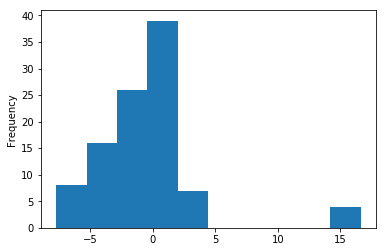

In [23]:
# Ex3: hist of logP

from matplotlib import pyplot as plt 
import pandas as pd

df = pd.read_csv('Datasets/molecules1_100_P.csv')
#df.head()

df['logP'].plot.hist()




## Ex3:
import matplotlib
load real dataset via csv

write script for 

In [ ]:
logP describes lipop/hydrophilicity
0 -> neutral
< 0 -> hydrophile
> 0 -> lipophile

# Ex4:
write number of c-atoms function
the more C-atoms are in a molecule the higher it's lipophilty (high logP)


In [24]:
import re
def find_num_C_atoms(smile):
    return len([match for match in re.finditer('C', smile)])
print(find_num_C_atoms('CCC1H-CC1N'))
print(find_num_C_atoms('CCC1H-CC1NCC'))
print(find_num_C_atoms(''))

5
7
0


# Ex5: 
scatter plot with #C-atoms vs. LogP

In [ ]:
find_num_C_atoms()

df = pd.concat([df, ])

# Ex6:
write # of rings function --> cluster plot from above 

In drug discovery, molecules with rings structures are of special interes+t. They use their ring structure to fit to cell receptors.
Filter for ringstructures with the provided function.